file = Q_res40 a temperatura T = 410
file = Q_res42 a temperatura T = 400
file = Q_res44 a temperatura T = 390
file = Q_res46 a temperatura T = 380
file = Q_res48 a temperatura T = 370
file = Q_res50 a temperatura T = 360
file = Q_res52 a temperatura T = 350
file = Q_res54 a temperatura T = 340
file = Q_res56 a temperatura T = 330
file = Q_res58 a temperatura T = 320
file = Q_res60 a temperatura T = 310
file = Q_res62 a temperatura T = 300
file = Q_res64 a temperatura T = 290
file = Q_res66 a temperatura T = 280
file = Q_res68 a temperatura T = 270
file = Q_res70 a temperatura T = 260
file = Q_res72 a temperatura T = 250
file = Q_res74 a temperatura T = 240
file = Q_res76 a temperatura T = 230
file = Q_res78 a temperatura T = 220
file = Q_res80 a temperatura T = 210
file = Q_res82 a temperatura T = 200
file = Q_res84 a temperatura T = 190
file = Q_res86 a temperatura T = 180
file = Q_res88 a temperatura T = 170
file = Q_res90 a temperatura T = 160
file = Q_res92 a temperatura T = 150
f

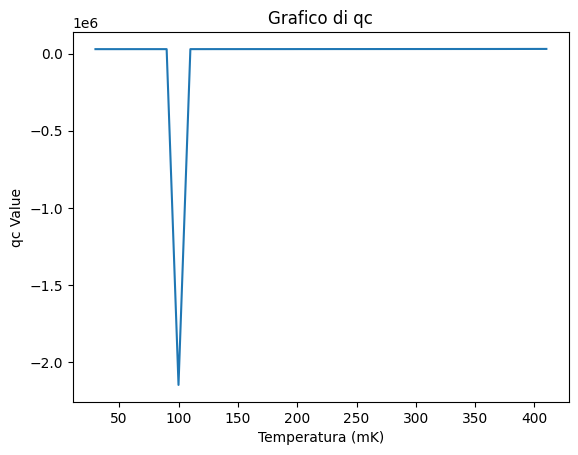

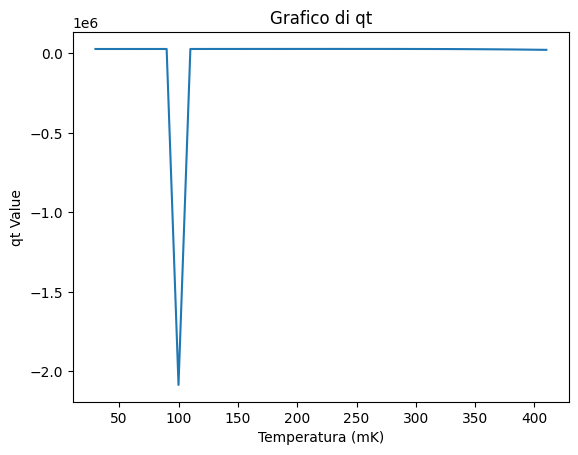

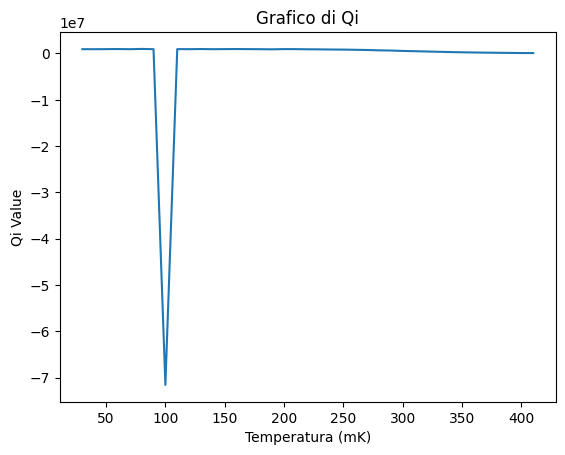

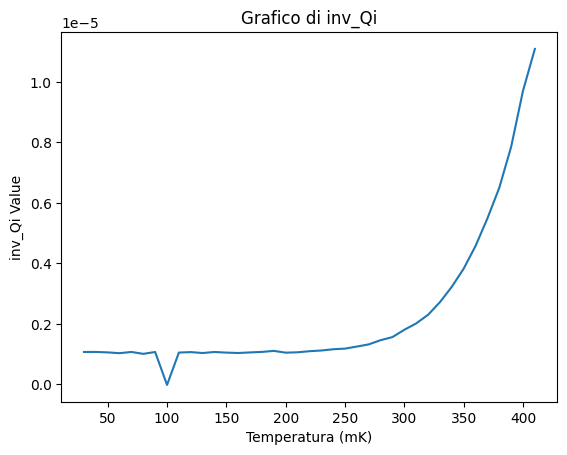

In [2]:
from circle import fit_full_resonator
import numpy as np
import matplotlib.pyplot as plt
files = []
qc_list = []
qi_list = []
qt_list = []
fr_list = []
p = np.arange (40, 118, 2)
Temp = np.arange (30, 420, 10)
Temp = Temp[::-1]
j = 0
for i in p :
    files.append (f"Q_res{i}")
    print(f"file = Q_res{i} a temperatura T = {Temp[j]}")
    j = j +1

for elem, T in zip(files, Temp):
    file_path = f"../../../data/Delta/gap_run12/{elem}.txt"
    qc, qi, qt, fr = fit_full_resonator(file_path)
    qc_list.append(qc)
    qi_list.append(qi)
    qt_list.append(qt)
    fr_list.append(fr)
Qt = np.array(qt_list)
Qc = np.array(qc_list)
Qi = np.array(qi_list)

inv_Qi = 1/Qi
params = [qc_list, qt_list, Qi, inv_Qi]  # Lista dei parametri da plottare
param_names = ['qc', 'qt', 'Qi', 'inv_Qi']  # Nome dei parametri

# Iteriamo su parametri e nomi
for elem, param_name in zip(params, param_names):
    fig, ax = plt.subplots(1, 1)
    ax.plot(Temp, elem)
    ax.set_title(f"Grafico di {param_name}")
    ax.set_xlabel("Temperatura (mK)")  # Assumendo che 'Temp' sia in mK
    ax.set_ylabel(f"{param_name} Value")  # Etichetta personalizzata per ogni parametro
    plt.show()

Successo del fit: True
Chi-quadro ridotto: 14.299985198407061
fr = 3177399829.5458 ± 31773998.2955
Q0 = 925379.6303 ± 1868.6168
Delta0_meV = 0.3018 ± 0.0001
alpha = 0.8000 ± 0.0080


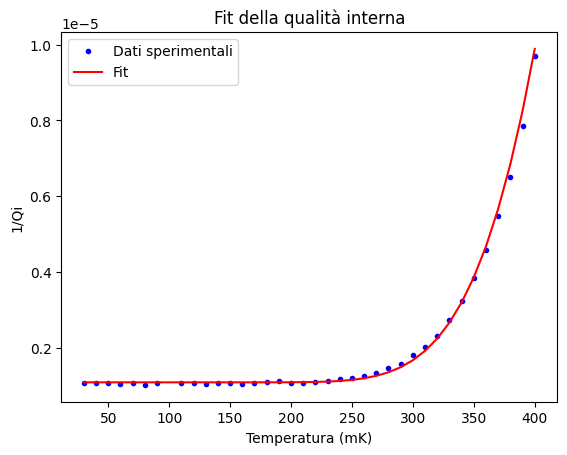

(925379.6302822281, 0.3017550361555861)

In [3]:

from circle import fit
Qc_cut = []
Qt_cut = []
Qi_cut = []
T_cut = []
T_err = {100, 410}  # Set di temperature da escludere

for qi, temp in zip(qi_list, Temp):
    if temp not in T_err:  # Mantieni solo se la temperatura NON è in T_err
        Qi_cut.append(qi)
        T_cut.append(temp)
        

cut = T_cut.index(30)
T_fit = T_cut[:cut + 1]  
Qi_fit = Qi_cut[:cut + 1]

fit(Qi_fit, T_fit, freq=fr_list[0], alpha_fixed=0.8)